In [1]:
#%reset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner

In [3]:
data=np.load('test_line.npy')

In [4]:
# Función en la que basaremos nuestro modelo, en nuesto caso una recta
def f(x, a, b):
    return a + b*x


In [8]:
# Likelihood
def logLikelihood(theta,x,y,erry):
    return -0.5*np.sum(np.log(2*np.pi*erry**2)+(y - f(x, *theta))**2/(erry**2))

#drfinimos los rangos en loa que estará el prior de m y de b

def priorm(m):
    
    if min_m < m and max_m > m:
        return 1
    else:
        return 0


def priorb(b):
    
    if min_b < b and max_b > b:
        return 1
    else:
        return 0

#definimos el prior total
def prior(m,b):
    
    p=priorb(b)*priorm(m)
    return p



In [9]:
#aquí definimos el posterior
def post(theta,x,y,erry):
    
    lnprior=np.log(prior(theta[0],theta[1]))
    
    lnLikehood=logLikelihood(theta,x,y,erry)
    
    lnpost=lnLikehood+lnprior
    
    return lnpost

In [10]:
#Rango de donde comenzará a correr hasta donde terminará m
min_m=-500
max_m=500

#Rango de donde comenzará a correr hasta donde terminará b
min_b=0
max_b=500

#Posición inicial donde comenzaremos a caminar
init_pos=[50,200]

pos = init_pos + 1e-4*np.random.randn(50,2)
nwalkers, ndim=pos.shape

C:\Users\Dea\Documents\anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


# A partir de aquí tenemos lo de la página de emcee

In [ ]:
sampler=emcee.EnsembleSampler(nwalkers,ndim,post,args=(data[0],data[1],data[2]))
sampler.run_mcmc(pos, 5000,progress=True);

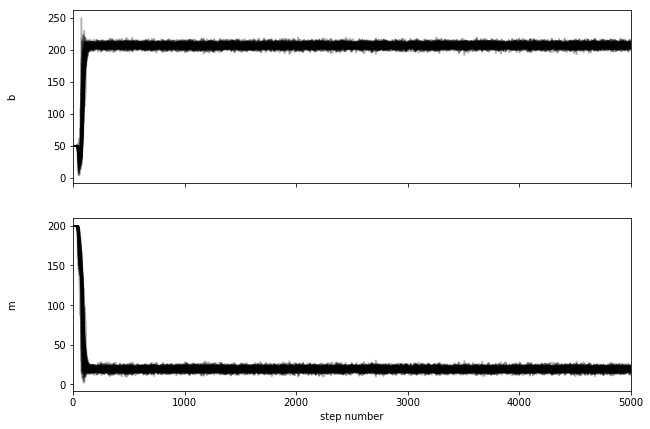

In [11]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["b", "m"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [12]:
flat_samples=sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(16300, 2)


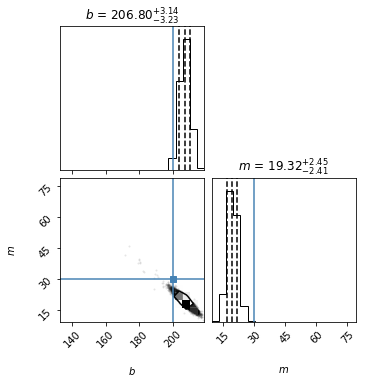

In [13]:
m_true , b_true= 30 , 200
figure=corner.corner(
    flat_samples,labels=[r"$b$", r"$m$", r"$\Gamma \, [\mathrm{parsec}]$"],
    quantiles=[0.16, 0.5, 0.84],show_titles=True, title_kwargs={"fontsize": 12},truths=[b_true,m_true])

In [14]:
from IPython.display import display, Math
labels = ["b", "m",]
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>